In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [18]:
df = pd.read_csv('../data/processed.csv')

In [19]:
# Sélection des colonnes numériques connues avant une plongée
cols_to_keep = ['Start', 'Gender', 'Discipline', 'AP', 'RP', 'Month', 'Year', 'Experience Dive', 'Experience Discipline']

# Filtrer le DataFrame pour ne garder que ces colonnes
df_selected = df[cols_to_keep]

# Normaliser les données
scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_selected), columns=df_selected.columns)
df_normalized['Card'] = df['Card']

In [20]:
df_normalized.head(5)

,Start,Gender,Discipline,AP,RP,Month,Year,Experience Dive,Experience Discipline,Card
0,-0.454174,0.733589,-1.296793,-0.863645,-1.156180,-0.162552,0.068079,-0.651966,-0.561072,1.0
1,-0.439146,0.733589,-1.296793,0.069633,-0.129514,-0.162552,0.068079,-0.651966,-0.561072,1.0
2,-0.424117,0.733589,-0.328568,0.069633,0.212708,-0.162552,0.068079,-0.651966,-0.561072,0.0
3,-0.409089,0.733589,0.639657,0.069633,0.212708,-0.162552,0.068079,-0.651966,-0.561072,0.0
4,-0.394061,-1.363161,0.639657,-1.627236,-1.498402,-0.162552,0.068079,-0.651966,-0.561072,0.0


In [21]:
# Sélectionner les plongées avec un carton rouge et blanc et gérer les NaN
df_red = df_normalized[df_normalized['Card'] == 2.0].drop('Card', axis=1).dropna()
df_white = df_normalized[df_normalized['Card'] == 0.0].drop('Card', axis=1).dropna()

c:\Users\alex6\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\alex6\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\alex6\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\alex6\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

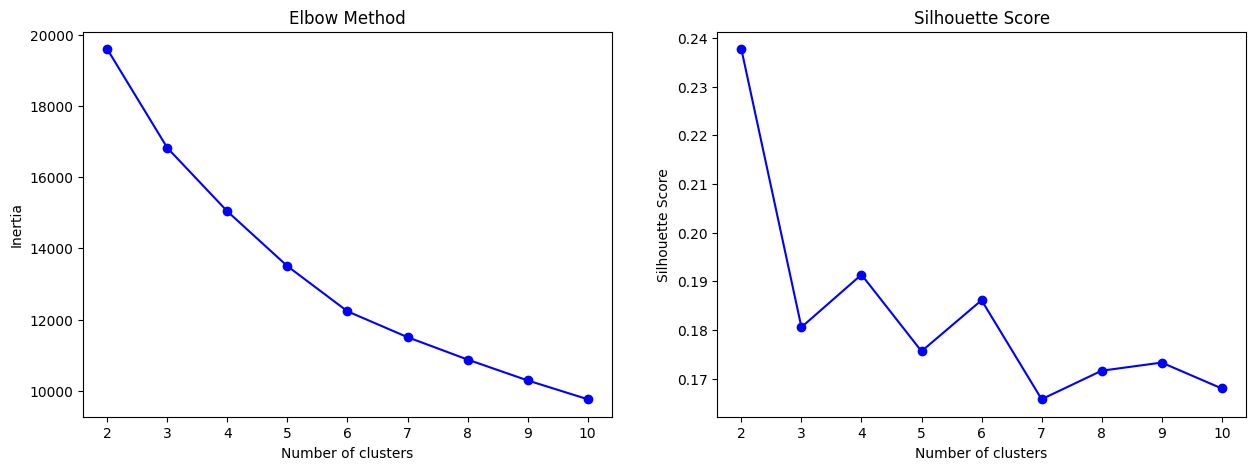

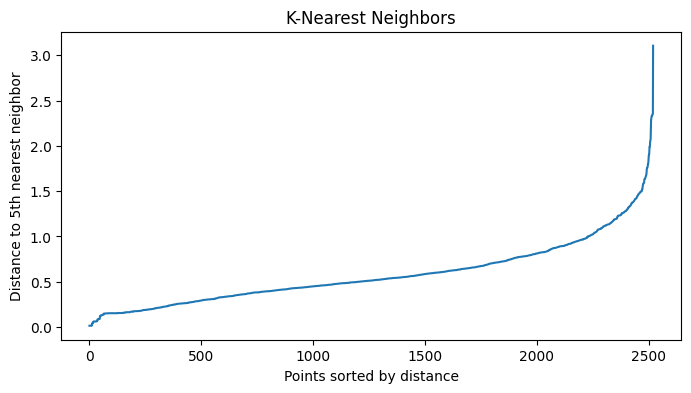

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# Pour K-means: Méthode du coude pour déterminer le nombre optimal de clusters
inertias = []
silhouette_scores = []
range_of_clusters = range(2, 11)  # Généralement de 2 à 10

for k in range_of_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_red)  
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_red, kmeans.labels_))

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(range_of_clusters, inertias, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(range_of_clusters, silhouette_scores, 'bo-')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Pour DBSCAN: Utilisation du graphique des k plus proches voisins pour déterminer le paramètre eps
nearest_neighbors = NearestNeighbors(n_neighbors=5)
nearest_neighbors.fit(df_red)
distances, indices = nearest_neighbors.kneighbors(df_red)

# Trier les distances par rapport au voisin le plus proche
distances = np.sort(distances, axis=0)[:, 1]  # Utiliser la distance au premier voisin si l'indice est 0

plt.figure(figsize=(8, 4))
plt.plot(distances)
plt.title('K-Nearest Neighbors')
plt.xlabel('Points sorted by distance')
plt.ylabel('Distance to 5th nearest neighbor')
plt.show()


In [23]:
'''
K-means : k=3 basé sur l'inertie et le score de silhouette.
DBSCAN : eps=0.5 basé sur le graphique des distances au 5ème plus proche voisin. 
Le min_samples pourrait être conservé à 5, comme c'est souvent la pratique pour des ensembles de données de taille moyenne, 
bien que cela puisse nécessiter un ajustement fin basé sur la connaissance spécifique du domaine ou des essais supplémentaires.
'''

"\nK-means : k=3 basé sur l'inertie et le score de silhouette.\nDBSCAN : eps=0.5 basé sur le graphique des distances au 5ème plus proche voisin. \nLe min_samples pourrait être conservé à 5, comme c'est souvent la pratique pour des ensembles de données de taille moyenne, \nbien que cela puisse nécessiter un ajustement fin basé sur la connaissance spécifique du domaine ou des essais supplémentaires.\n"

c:\Users\alex6\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\alex6\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


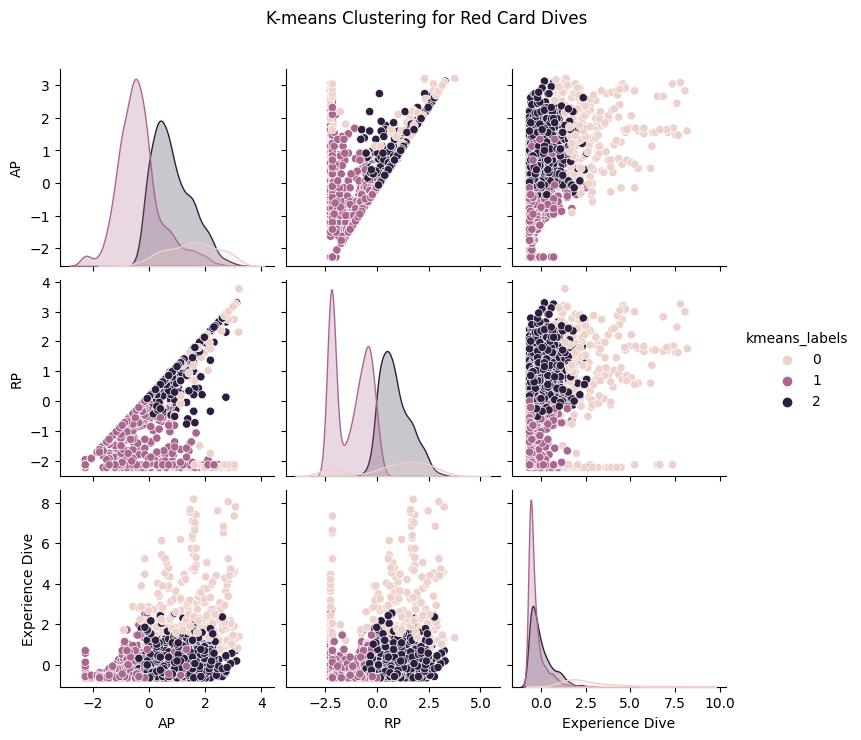

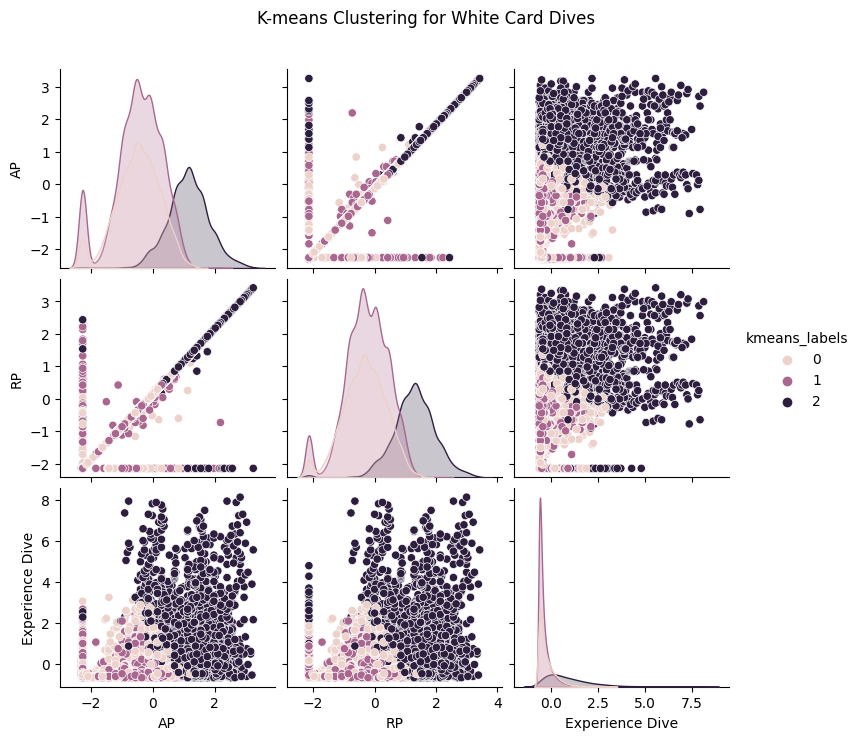

Cluster 1 (Red Card Dives):
                AP           RP  Experience Dive
count  1234.000000  1234.000000      1234.000000
mean     -0.354653    -1.229048        -0.315010
std       0.777852     0.835806         0.470568
min      -2.263561    -2.225623        -0.651966
25%      -0.821223    -2.140068        -0.587888
50%      -0.439428    -1.070624        -0.523810
75%      -0.057632    -0.428958        -0.203418
max       2.572513     0.255486         2.808262 

Cluster 2 (Red Card Dives):
                AP           RP  Experience Dive
count  1022.000000  1022.000000      1022.000000
mean      0.818861     0.878860        -0.011622
std       0.688986     0.720212         0.618976
min      -0.354584    -0.771180        -0.651966
25%       0.281741     0.341041        -0.459731
50%       0.705958     0.726041        -0.203418
75%       1.299862     1.324929         0.309208
max       3.123996     3.292705         2.551949 

Cluster 0 (Red Card Dives):
               AP          RP 

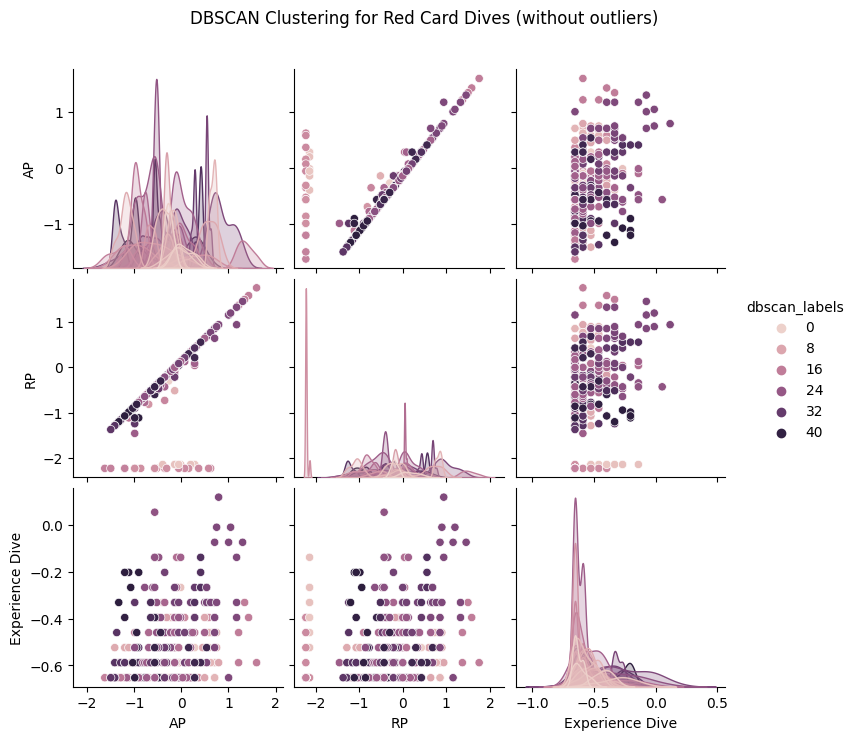

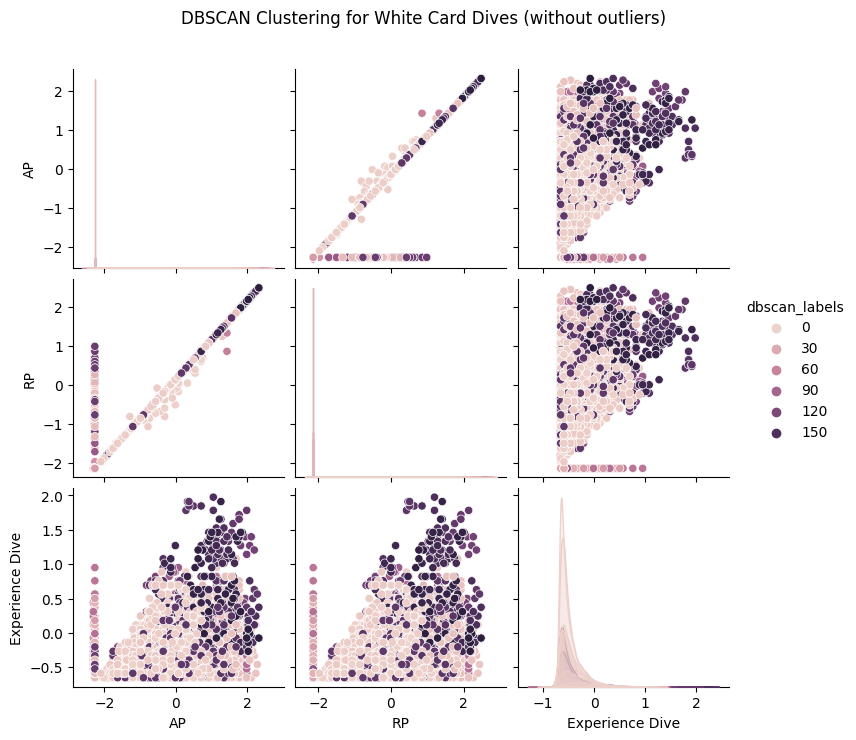

Cluster 0 (Red Card Dives):
             AP        RP  Experience Dive
count  6.000000  6.000000         6.000000
mean  -0.269741 -0.193681        -0.630607
std    0.080490  0.075318         0.033090
min   -0.354584 -0.300625        -0.651966
25%   -0.333374 -0.215070        -0.651966
50%   -0.269741 -0.215070        -0.651966
75%   -0.237925 -0.150903        -0.603908
max   -0.142476 -0.086736        -0.587888 

Cluster 1 (Red Card Dives):
             AP        RP  Experience Dive
count  5.000000  5.000000         5.000000
mean   0.035695  0.169930        -0.613519
std    0.178474  0.188901         0.057313
min   -0.142476 -0.001181        -0.651966
25%   -0.100054 -0.001181        -0.651966
50%   -0.015211  0.127152        -0.651966
75%    0.154476  0.298263        -0.587888
max    0.281741  0.426597        -0.523810 

Cluster 7 (Red Card Dives):
              AP         RP  Experience Dive
count  11.000000  11.000000        11.000000
mean   -1.183736  -1.086180        -0.547111
std

In [24]:
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Clustering avec K-means
kmeans_red = KMeans(n_clusters=3, random_state=42).fit(df_red)  # Nombre de clusters ajusté à 3
kmeans_white = KMeans(n_clusters=3, random_state=42).fit(df_white)  # Nombre de clusters ajusté à 3
df_red['kmeans_labels'] = kmeans_red.labels_
df_white['kmeans_labels'] = kmeans_white.labels_

# Clustering avec DBSCAN
dbscan_red = DBSCAN(eps=0.5, min_samples=5).fit(df_red)  # 'eps' ajusté selon le graphique des voisins
dbscan_white = DBSCAN(eps=0.5, min_samples=5).fit(df_white)  # 'eps' ajusté selon le graphique des voisins
df_red['dbscan_labels'] = dbscan_red.labels_
df_white['dbscan_labels'] = dbscan_white.labels_


features = ['AP', 'RP', 'Experience Dive']

# Visualiser les clusters K-means pour les plongées avec carton rouge
g = sns.pairplot(df_red[features + ['kmeans_labels']], hue='kmeans_labels')
plt.subplots_adjust(top=0.9)  # Ajuster l'espace en haut pour le titre
g.fig.suptitle('K-means Clustering for Red Card Dives')  # Titre au-dessus des graphiques
plt.show()

# Visualiser les clusters K-means pour les plongées avec carton blanc
g = sns.pairplot(df_white[features + ['kmeans_labels']], hue='kmeans_labels')
plt.subplots_adjust(top=0.9)  # Ajuster l'espace en haut pour le titre
g.fig.suptitle('K-means Clustering for White Card Dives')  # Titre au-dessus des graphiques
plt.show()

# Décrire les clusters K-means
for label in df_red['kmeans_labels'].unique():
    print(f"Cluster {label} (Red Card Dives):")
    print(df_red[df_red['kmeans_labels'] == label][features].describe(), "\n")

for label in df_white['kmeans_labels'].unique():
    print(f"Cluster {label} (White Card Dives):")
    print(df_white[df_white['kmeans_labels'] == label][features].describe(), "\n")

# Filtrer les outliers de DBSCAN avant la description et la visualisation
df_red_filtered = df_red[df_red['dbscan_labels'] != -1]
df_white_filtered = df_white[df_white['dbscan_labels'] != -1]

# Visualiser les clusters DBSCAN pour les plongées avec carton rouge sans outliers
h = sns.pairplot(df_red_filtered[features + ['dbscan_labels']], hue='dbscan_labels')
plt.subplots_adjust(top=0.9)  # Ajuster l'espace en haut pour le titre
h.fig.suptitle('DBSCAN Clustering for Red Card Dives (without outliers)')
plt.show()

# Visualiser les clusters DBSCAN pour les plongées avec carton blanc sans outliers
h = sns.pairplot(df_white_filtered[features + ['dbscan_labels']], hue='dbscan_labels')
plt.subplots_adjust(top=0.9)  # Ajuster l'espace en haut pour le titre
h.fig.suptitle('DBSCAN Clustering for White Card Dives (without outliers)')
plt.show()

# Décrire les clusters DBSCAN
for label in df_red_filtered['dbscan_labels'].unique():
    print(f"Cluster {label} (Red Card Dives):")
    print(df_red_filtered[df_red_filtered['dbscan_labels'] == label][features].describe(), "\n")

for label in df_white_filtered['dbscan_labels'].unique():
    print(f"Cluster {label} (White Card Dives):")
    print(df_white_filtered[df_white_filtered['dbscan_labels'] == label][features].describe(), "\n")


In [25]:
"""
    Analyse des résultats de clustering obtenus par les algorithmes K-means et DBSCAN sur les données de plongée 
    normalisées pour les cartons rouges et blancs.

    Résultats de K-means Clustering:
    - Carton Rouge :
      - Cluster 0 : Caractérisé par des valeurs élevées dans les variables, indiquant des plongeurs expérimentés ou des plongées complexes.
      - Cluster 1 : Comprend des valeurs moyennes, suggérant des plongeurs intermédiaires ou des plongées de difficulté modérée.
      - Cluster 2 : Regroupe des valeurs faibles en 'Experience Dive', impliquant des plongeurs débutants ou peu expérimentés.

    - Carton Blanc :
      - Cluster 0 : Englobe la majorité des plongées avec une tendance vers des expériences de plongée élevées, indiquant des plongées réussies.
      - Cluster 1 et 2 : Présentent une variabilité des expériences réussies, reflétant une diversité de compétences et de situations de plongée.

    Résultats de DBSCAN Clustering:
    - Carton Rouge :
      - Identification de plusieurs petits clusters et de nombreux outliers, indiquant une hétérogénéité des profils de plongée.
    
    - Carton Blanc :
      - Révélation de quelques clusters avec de nombreux outliers, suggérant une séparation moins nette des types de plongée réussies.

    Conclusions:
    - Les clusters définis par K-means montrent des regroupements clairs 
    qui pourraient informer sur les différents niveaux d'expérience et les types de plongée.
    - DBSCAN présente des clusters moins distincts, 
    ce qui pourrait nécessiter un ajustement des paramètres ou indiquer que la méthode est moins adaptée pour ces données.
    """

"\n    Analyse des résultats de clustering obtenus par les algorithmes K-means et DBSCAN sur les données de plongée \n    normalisées pour les cartons rouges et blancs.\n\n    Résultats de K-means Clustering:\n    - Carton Rouge :\n      - Cluster 0 : Caractérisé par des valeurs élevées dans les variables, indiquant des plongeurs expérimentés ou des plongées complexes.\n      - Cluster 1 : Comprend des valeurs moyennes, suggérant des plongeurs intermédiaires ou des plongées de difficulté modérée.\n      - Cluster 2 : Regroupe des valeurs faibles en 'Experience Dive', impliquant des plongeurs débutants ou peu expérimentés.\n\n    - Carton Blanc :\n      - Cluster 0 : Englobe la majorité des plongées avec une tendance vers des expériences de plongée élevées, indiquant des plongées réussies.\n      - Cluster 1 et 2 : Présentent une variabilité des expériences réussies, reflétant une diversité de compétences et de situations de plongée.\n\n    Résultats de DBSCAN Clustering:\n    - Carton 

In [26]:
'''
On a choisis les hyperparamètres avant de faire les affichages, grâce à l'elbow method notamment.
'''

"\nOn a choisis les hyperparamètres avant de faire les affichages, grâce à l'elbow method notamment.\n"

In [27]:
'''
   """
    K-means Clustering:
    - Pour: Segmentation nette, bonne pour définir des niveaux d'expérience.
    - Contre: Nécessite le nombre de clusters prédéfini, suppose des clusters sphériques.

    DBSCAN Clustering:
    - Pour: Détecte des clusters de formes variées et gère bien le bruit.
    - Contre: Paramétrage d'`eps` et `min_samples` peut être complexe.

    Adaptation au problème:
    - K-means et DBSCAN sont adaptés mais exigent une personnalisation soignée et une interprétation informée par les connaissances du domaine.
    """
'''

'\n   """\n    K-means Clustering:\n    - Pour: Segmentation nette, bonne pour définir des niveaux d\'expérience.\n    - Contre: Nécessite le nombre de clusters prédéfini, suppose des clusters sphériques.\n\n    DBSCAN Clustering:\n    - Pour: Détecte des clusters de formes variées et gère bien le bruit.\n    - Contre: Paramétrage d\'`eps` et `min_samples` peut être complexe.\n\n    Adaptation au problème:\n    - K-means et DBSCAN sont adaptés mais exigent une personnalisation soignée et une interprétation informée par les connaissances du domaine.\n    """\n'

In [28]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

df_normalized = df_normalized.dropna()
X = df_normalized[['Start', 'Gender', 'Discipline', 'AP', 'RP', 'Month', 'Year', 'Experience Dive', 'Experience Discipline']]  
y = df_normalized['Card']  # Les résultats de la plongée, avec les cartons comme classes
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)  # Encoder les labels de résultats en valeurs numériques

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Entraînement et prédiction avec SVM
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    clf = svm.SVC(kernel=kernel, gamma='auto')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Évaluation du modèle
    print(f"Classification report for kernel={kernel}:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True)
    plt.title(f'Confusion Matrix for {kernel} kernel')
    plt.show()

# Justification des choix :
# Les choix de noyaux sont basés sur la nécessité de comparer des approches linéaires et non linéaires.
# Des visualisations comme les matrices de confusion sont utilisées pour évaluer la performance.


KeyboardInterrupt: 

In [ ]:
# Création d'un DataFrame pour les résultats
results = {
    'Kernel': ['Linear', 'Polynomial', 'RBF', 'Sigmoid'],
    'Precision [0]': [0.87, 0.81, 0.85, 0.76],
    'Recall [0]': [0.99, 0.99, 0.99, 0.84],
    'F1-score [0]': [0.93, 0.89, 0.92, 0.80],
    'Precision [1]': [0.78, 0.86, 0.89, 0.29],
    'Recall [1]': [0.80, 0.50, 0.70, 0.31],
    'F1-score [1]': [0.79, 0.64, 0.78, 0.30],
    'Precision [2]': [0.00, 0.73, 0.73, 0.37],
    'Recall [2]': [0.00, 0.17, 0.19, 0.04],
    'F1-score [2]': [0.00, 0.27, 0.30, 0.07],
    'Accuracy': [0.86, 0.82, 0.86, 0.66]
}

results_df = pd.DataFrame(results)
results_df

,Kernel,Precision [0],Recall [0],F1-score [0],Precision [1],Recall [1],F1-score [1],Precision [2],Recall [2],F1-score [2],Accuracy
0,Linear,0.87,0.99,0.93,0.78,0.80,0.79,0.00,0.00,0.00,0.86
1,Polynomial,0.81,0.99,0.89,0.86,0.50,0.64,0.73,0.17,0.27,0.82
2,RBF,0.85,0.99,0.92,0.89,0.70,0.78,0.73,0.19,0.30,0.86
3,Sigmoid,0.76,0.84,0.80,0.29,0.31,0.30,0.37,0.04,0.07,0.66


In [ ]:
'''
En termes d'exactitude (accuracy), les noyaux linéaire et RBF se sont avérés être les meilleurs, 
indiquant qu'ils pourraient être les plus appropriés pour ce problème de classification, 
bien qu'il puisse y avoir un déséquilibre dans les classes qui pourrait affecter cette métrique.

Dans l'ensemble, ces résultats suggèrent que le choix du noyau dépend grandement de la distribution spécifique des classes dans les données. 
Les noyaux linéaire et RBF semblent être les plus prometteurs pour une classification globale, 
mais une attention particulière doit être portée à la classe 2, qui reste difficile à classifier correctement. 
Des techniques supplémentaires, telles que le rééquilibrage des classes ou une analyse plus approfondie des caractéristiques, 
pourraient être nécessaires pour améliorer la performance de la classification.
'''

"\nEn termes d'exactitude (accuracy), les noyaux linéaire et RBF se sont avérés être les meilleurs, \nindiquant qu'ils pourraient être les plus appropriés pour ce problème de classification, \nbien qu'il puisse y avoir un déséquilibre dans les classes qui pourrait affecter cette métrique.\n\nDans l'ensemble, ces résultats suggèrent que le choix du noyau dépend grandement de la distribution spécifique des classes dans les données. \nLes noyaux linéaire et RBF semblent être les plus prometteurs pour une classification globale, \nmais une attention particulière doit être portée à la classe 2, qui reste difficile à classifier correctement. \nDes techniques supplémentaires, telles que le rééquilibrage des classes ou une analyse plus approfondie des caractéristiques, \npourraient être nécessaires pour améliorer la performance de la classification.\n"

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


# Entraînement du modèle d'arbre de décision
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

# Prédiction avec l'arbre de décision
y_pred_dt = dt_clf.predict(X_test)

# Évaluation du modèle d'arbre de décision
print("Classification report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))

# Comparaison avec les résultats SVM
# Ajouter les résultats de l'arbre de décision au DataFrame
dt_results = pd.DataFrame({
    'Kernel': ['Decision Tree'],
    'Precision [0]': [precision_score(y_test, y_pred_dt, labels=[0], average=None)[0]],
    'Recall [0]': [recall_score(y_test, y_pred_dt, labels=[0], average=None)[0]],
    'F1-score [0]': [f1_score(y_test, y_pred_dt, labels=[0], average=None)[0]],
    'Precision [1]': [precision_score(y_test, y_pred_dt, labels=[1], average=None)[0]],
    'Recall [1]': [recall_score(y_test, y_pred_dt, labels=[1], average=None)[0]],
    'F1-score [1]': [f1_score(y_test, y_pred_dt, labels=[1], average=None)[0]],
    'Precision [2]': [precision_score(y_test, y_pred_dt, labels=[2], average=None)[0]],
    'Recall [2]': [recall_score(y_test, y_pred_dt, labels=[2], average=None)[0]],
    'F1-score [2]': [f1_score(y_test, y_pred_dt, labels=[2], average=None)[0]],
    'Accuracy': [accuracy_score(y_test, y_pred_dt)]
})

# Concaténation du nouveau DataFrame avec les résultats existants
results_df = pd.concat([results_df, dt_results], ignore_index=True)

# Affichage du tableau mis à jour
results_df


Classification report for Decision Tree:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      5551
           1       0.77      0.77      0.77      1489
           2       0.31      0.35      0.32       775

    accuracy                           0.80      7815
   macro avg       0.66      0.67      0.66      7815
weighted avg       0.81      0.80      0.81      7815



,Kernel,Precision [0],Recall [0],F1-score [0],Precision [1],Recall [1],F1-score [1],Precision [2],Recall [2],F1-score [2],Accuracy
0,Linear,0.870000,0.990000,0.930000,0.780000,0.800000,0.790000,0.000000,0.000000,0.000000,0.860000
1,Polynomial,0.810000,0.990000,0.890000,0.860000,0.500000,0.640000,0.730000,0.170000,0.270000,0.820000
2,RBF,0.850000,0.990000,0.920000,0.890000,0.700000,0.780000,0.730000,0.190000,0.300000,0.860000
3,Sigmoid,0.760000,0.840000,0.800000,0.290000,0.310000,0.300000,0.370000,0.040000,0.070000,0.660000
4,Decision Tree,0.894533,0.875518,0.884924,0.768155,0.774345,0.771237,0.305335,0.347097,0.324879,0.803839


In [ ]:
    """
    Summary of classifier performance:

    - Decision Tree shows balanced classification across classes, better for minority class.
    - Linear and RBF SVMs excel in predicting majority class but fail for class 2.
    - Polynomial SVM offers a compromise with moderate performance on class 2.
    - Sigmoid SVM underperforms across all classes.
    - Decision Tree is preferred for balanced multiclass classification despite a marginal drop in class 0 accuracy.
    """

'\nSummary of classifier performance:\n\n- Decision Tree shows balanced classification across classes, better for minority class.\n- Linear and RBF SVMs excel in predicting majority class but fail for class 2.\n- Polynomial SVM offers a compromise with moderate performance on class 2.\n- Sigmoid SVM underperforms across all classes.\n- Decision Tree is preferred for balanced multiclass classification despite a marginal drop in class 0 accuracy.\n'